# **DSL 24-1 기초 과제 1**

### 기수 : 11기
### 이름 : 송예원

In [1]:
# 코랩에서 작성할 경우
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


필수 라이버러리 갖고오기

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import timeit
from scipy import stats

## **1-3**

아래와 같이 $X \sim \operatorname{Unif}(0, 1)$ 에서 $10,000$ 개 만큼 뽑은 다음에 히스토그램을 그리게 되면 다음과 같이 나오게 됩니다.

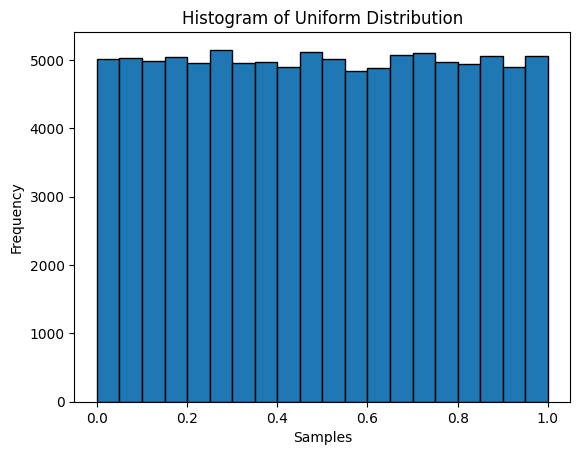

In [ ]:
samples = np.random.uniform(low=0, high=1, size=100000)

plt.hist(samples, bins=20, edgecolor = 'black')
plt.xlabel('Samples')
plt.ylabel('Frequency')
plt.title('Histogram of Uniform Distribution')
plt.show()

$100,000$ 개를 뽑아도 $\operatorname{Unif}(0, 1)$ 분포의 모양을 따르게 됩니다.
<br>하지만 CLT 에 의하면 이것의 평균이 정규분포를 따르게 된다는 것입니다.

다음과 같이 $100,000$ 개를 $50$ 개 만큼 가진 Group 으로 나누겠습니다. 그러면 다음과 같이 $2000$ 개의 Group 으로 나눌 수가 있습니다.

In [ ]:
samples = np.random.uniform(low=0, high=1, size=100000)

samples = samples.reshape(50, -1)
print(samples.shape)

(50, 2000)


각 Group 은 $\operatorname{Unif}(0, 1)$ 의 분포를 따르게 되며, 이는 다음과 같이 1개의 Group 만 예시로 보이겠습니다.

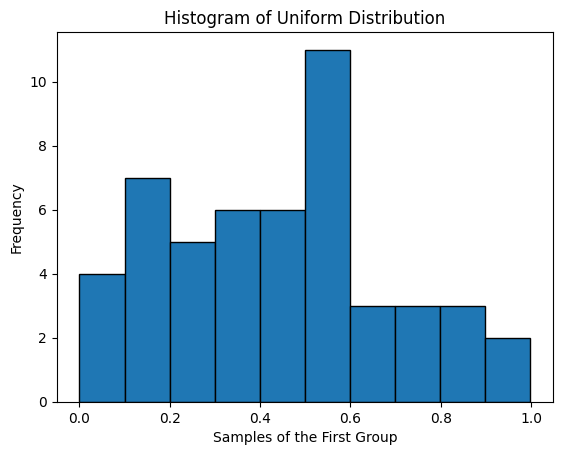

In [ ]:
plt.hist(samples[:, 0], bins=10, edgecolor = 'black')
plt.xlabel('Samples of the First Group')
plt.ylabel('Frequency')
plt.title('Histogram of Uniform Distribution')
plt.show()

각 Group 들의 평균들을 모아서 히스토그램을 그리게 된다면 $200$ 개의 Group 이 존재했기 때문에 다음과 같이 $200$ 개의 데이터를 통해서 히스토그램을 만드는 것이 가능합니다.

Text(0.5, 1.0, 'Histogram of Sample Means for Uniform Distribution')

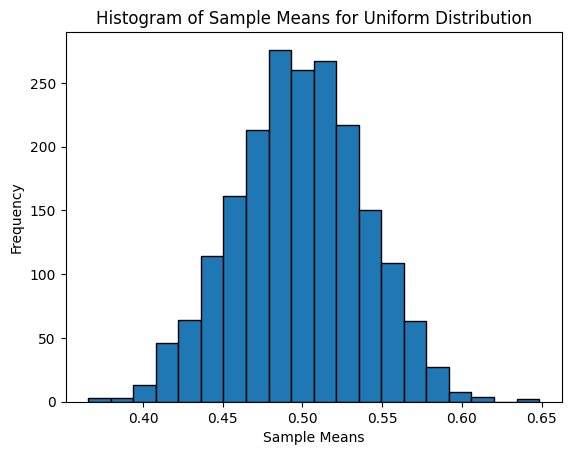

In [ ]:
samples_mean = np.mean(samples, axis = 0)

plt.hist(samples_mean, bins=20, edgecolor = 'black')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Means for Uniform Distribution')

위와 같이 평균들의 분포는 정규분포 모양을 띄우게 되며 Uniform - 분포 의 평균들은 Central Limit Theorem 에 의해서 정규분포를 따르게 된다는 것을 알 수 있게 됩니다.

정확히 이것이 정규분포로 간다는 것을 알기 위해서는 Z-검정을 통해서 해야하지만, 위의 히스토그램 만으로 정규분포로 근사한다는 것을 알 수 있기 때문에 넘기겠습니다.

## **문제 1-3**

위의 예시에서는 Uniform-분포가 CLT 에 의해서 평균이 정규분포를 따르게 된다는 것을 보였습니다. 똑같은 것을 빈도 / Rate $(\lambda)$ 값 2 인 Exponential-분포 (지수분포), 즉
$$
X \sim \operatorname{Exp}(2)
$$ 에서 보여주시오.

부연 설명 :
- 지수 분포를 랜덤추출하는 코드는 다음과 같습니다 (np.random.exponential(Scale, 10))
- 해당 코드에서는 Scale 을 사용하며, 이것은 Rate 의 Inverse 값으로 $\text{Rate} = \frac{1}{\text{Scale}}$ 입니다
- 자유롭게 서술하시면 되며, 위의 예시와 크게 안 바뀌어도 괜찮습니다. 하지만 마지막에는 평균 값들로 이루어진 히스토그램이 정규분포의 모습과 유사한 모습을 보여야 합니다.

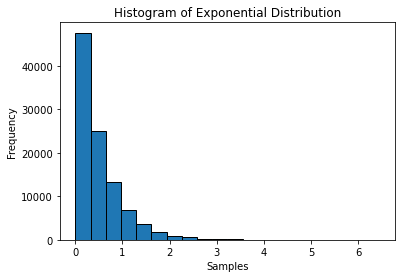

In [ ]:
samples = np.random.exponential(scale=1/2,size=100000)
plt.hist(samples, bins=20, edgecolor = 'black')
plt.xlabel('Samples')
plt.ylabel('Frequency')
plt.title('Histogram of Exponential Distribution')
plt.show()

2000개의 group

In [ ]:
#50개씩 2000개의 group으로 100,000개의 데이터 나누기
samples_2 = samples.reshape(2000, -1)

In [ ]:
samples_2.shape

(2000, 50)

In [ ]:
samples_2[0].size

50

In [ ]:
samples_2[1].size

50

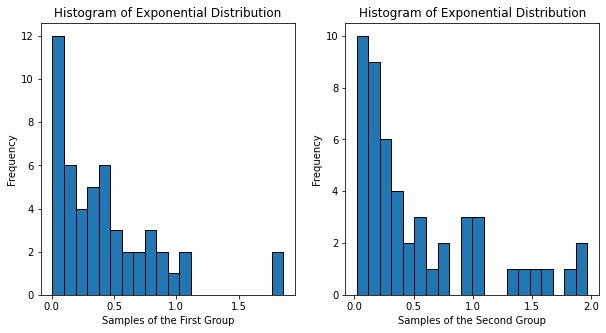

In [ ]:
#2개의 Group 예시로 보이기
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax[0].hist(samples_2[0], bins=20, edgecolor = 'black')
ax[0].set(xlabel='Samples of the First Group',ylabel='Frequency',
         title='Histogram of Exponential Distribution')


ax[1].hist(samples_2[1], bins=20, edgecolor = 'black')
ax[1].set(xlabel='Samples of the Second Group',ylabel='Frequency',
         title='Histogram of Exponential Distribution')

plt.show()

- 각 Group 역시 오른쪽으로 꼬리가 길게 늘어진 지수 분포를 따른다

In [ ]:
samples_2

array([[0.32251939, 0.35409766, 1.81022841, ..., 0.85289604, 0.34879041,
        0.79892118],
       [0.92066934, 0.10720454, 1.5131489 , ..., 0.47255252, 0.18942352,
        0.77215712],
       [0.37695288, 0.56345545, 0.73432371, ..., 0.25055645, 0.6884253 ,
        0.35388606],
       ...,
       [0.1912219 , 1.15861776, 0.08446891, ..., 0.26996075, 1.04621192,
        0.13278061],
       [0.80165949, 0.80343397, 0.95918926, ..., 0.59369746, 0.7607    ,
        0.76467938],
       [0.00854292, 0.70541491, 0.48376247, ..., 0.10578341, 0.52484747,
        1.26612784]])

In [ ]:
samples_2.shape (2000행 , 50열)

(2000, 50)

In [ ]:
samples_mean = np.mean(samples_2, axis = 1)

In [ ]:
samples_mean.shape #2000개의 평균 값

(2000,)

Text(0.5, 1.0, 'Histogram of Sample Means for Exponential Distribution')

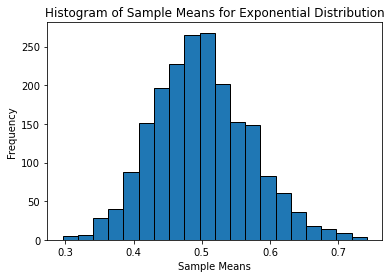

In [ ]:
#2000개 Group들 각각의 평균 모아서 히스토그램 그리기
plt.hist(samples_mean, bins=20, edgecolor = 'black')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Means for Exponential Distribution')

- 평균들의 분포가 bell shape인 정규분포를 따라간다

## **2-3**

해당 문제에서는 예시 사진을 이용해서 SVD-Decomposition 이 어떻게 사진을 압축하는데에 사용이 되는지를 보여주고 있습니다. 문제에서 요구하는 것은 직접 자기가 선정한 사진을 이용해서 SVD-Decomposition 을 활용해서 Sigma 차원을 $100$ 으로 설정해서 용량이 정말로 줄어드는지를 확인할 것입니다.

경로 설정 (이거는 image.jpg 경로로 바꿔주세요!)

In [ ]:
import os
print(os.getcwd())

/Users/yewonsong/Desktop/DSL/과제/기초 과제 1


In [ ]:
path_to_image = "/Users/yewonsong/Desktop/DSL/과제/기초 과제 1/image.jpg"

이미지 출력해서 확인해보기 (**SVD 의 편의상을 위해서 흑백을 사용할 예정입니다**)

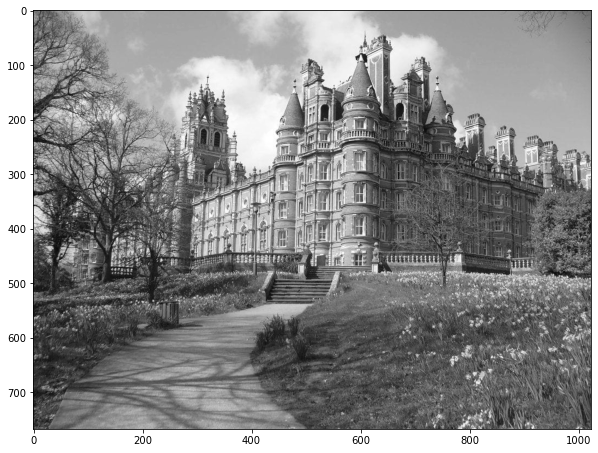

In [ ]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10, 13))
plt.imshow(image, cmap='gray')

다음과 같이 이미지를 Float32 형태의 데이터로 바꾸겠습니다.

In [ ]:
image_float = image.astype(np.float32)

그 뒤에 np.linalg.svd 를 활용해서 SVD-Decomposition 을 진행하겠습니다. 여기에서 np.linalg.svd 의 아웃풋은 $U$, 시그마 값, $V^\top$ 가 나오게 되며, 시그마 값을 이용해서 대각선에는 시그마 값들이 있으며 나머지는 $0$ 인 메트릭스를 만들겠습니다.

In [ ]:
image_float.shape

(768, 1024)

In [ ]:
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)

# 시그마 행렬 확인 용도
print(Sigma_mat.shape)

(768, 1024)


 여기서부터는 해당 이미지에 관해서 고유벡터 $70$ 개만 쓰겠습니다. 즉 나머지 원소들은 $0$ 으로 보내겠다는 것입니다.

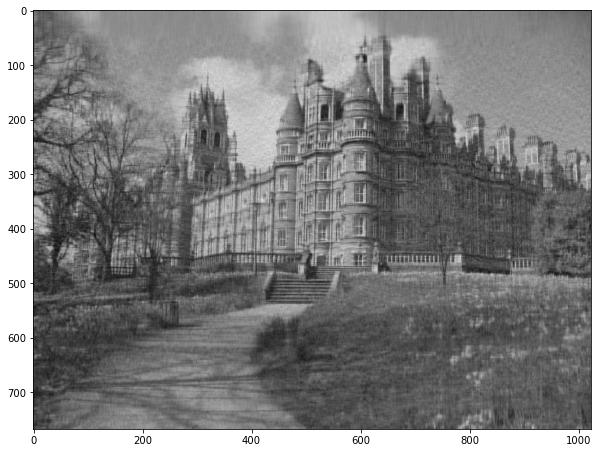

In [ ]:
image_composition = np.matmul(U[:, :70], np.matmul(Sigma_mat[:70, :70], Vt[:70, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

전에 비해서 확실히 흐릿해진 모습을 보이고 있습니다. 그렇다면 해당 사진과 이전 사진과 비교해서 어떤 것이 더 많은 용량 (즉 더 많은 Non-Zero 값)들을 사용하고 있는지 알아보겠습니다.

In [ ]:
def count_nonzero_full_image():
    return np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt)

def count_nonzero_compressed_image():
    return np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :])

full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  1639168  Non-zero Elements
Image Composition uses  125510  Non-zero Elements
Processing Time for 10 Full Images: 10.44207 seconds
Processing Time for 10 Compressed Images: 0.49516 seconds


원본과 확연히 큰 차이를 보이고 있습니다. 물론 흐릿해진 모습과 같이 정보가 많이 손실되긴 하지만 그래도 원래 이미지가 무엇을 표현하고 싶은지에 대한 정보는 아직 포함하고 있습니다. 그렇기 때문에 SVD-Decomposition 을 활용하면 더 적은 용량을 통해서 원본의 정보를 살릴 수 있다는 장점이 있습니다.

## **문제 2-3**

아래에는 Skeleton Code 가 있습니다. 빈칸에 자기가 원하는 사진과 차원 수를 조정하면서 원본에 비해서 적은 용량을 차지하면서도 원본에 대한 정보를 유지해주세요.

In [ ]:
path_to_image = "/Users/yewonsong/Desktop/DSL/과제/기초 과제 1/im.jpg"

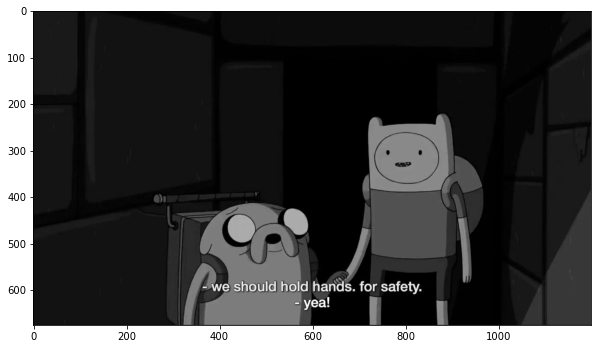

In [ ]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10, 13))
plt.imshow(image, cmap='gray')

In [ ]:
image_float = image.astype(np.float32)
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)
print("Image Float's Shape : ", image_float.shape)

Image Float's Shape :  (675, 1200)


시그마 메트릭스 $(\Sigma)$ 차원 설정

In [ ]:
num_elements = 40

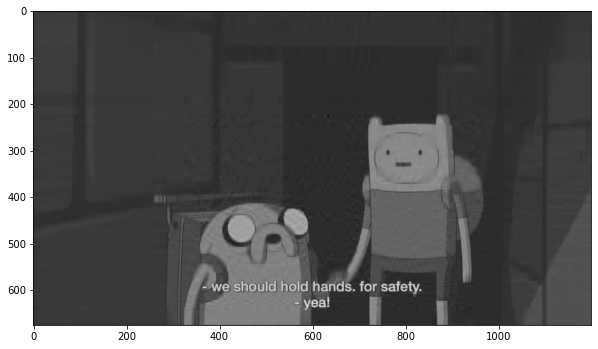

In [ ]:
image_composition = np.matmul(U[:, :num_elements], np.matmul(Sigma_mat[:num_elements, :num_elements], Vt[:num_elements, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

In [ ]:
full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  1896300  Non-zero Elements
Image Composition uses  131320  Non-zero Elements
Processing Time for 10 Full Images: 13.8549 seconds
Processing Time for 10 Compressed Images: 0.6261 seconds


- 원본 이미지 보다 훨씬 적은 용량을 사용하고 있습니다.
- 흐릿해졌지만 인물의 표정과 영어 글씨는 아직 읽을 수 있습니다.

## **문제 4-2**

파이썬의 scipy.stats 을 활용해서 유의수준 5%에서의 가설검정을 수행하고 결론을 도출하시오.

heights.csv 경로 설정하기

In [3]:
path_to_csv = "/content/drive/MyDrive/DSL/과제/기초 과제 1/heights.csv"

전처리

In [4]:
data = pd.read_csv(path_to_csv)
DSL = data[data['which'] == 'DSL']
ESC = data[data['which'] == 'ESC']
Else = data[data['which'] == 'Else']

DSL 데이터 형태

In [5]:
DSL.head()

,heights,which
0,181.8,DSL
1,161.3,DSL
2,177.8,DSL
3,169.1,DSL
4,181.2,DSL


ESC 데이터 형태

In [ ]:
ESC.head()

,heights,which
78,171.1,ESC
79,159.2,ESC
80,184.9,ESC
81,176.1,ESC
82,184.8,ESC


Else 데이터 형태

In [ ]:
  Else.head()

,heights,which
141,180.6,Else
142,169.3,Else
143,176.0,Else
144,180.3,Else
145,177.7,Else


답안 :

In [15]:
F, pvalue = stats.f_oneway(DSL['heights'], ESC['heights'], Else['heights'])
print(F);print(pvalue)


6.82185346949053
0.0013059664602332191


In [16]:
print(f"F-value: {F:.4f}")
print(f"p-value: {pvalue:.4f}")
if pvalue>0.05:
  print(f"p-value={pvalue:.4f}>0.05 이므로 귀무가설을 기각하지 못한다.\n유의수준 5%에서 학회마다 평균 키가 똑같다고 할 수 있다.")
else:
  print(f"p-value={pvalue:.4f}<0.05 이므로 귀무가설을 기각한다.\n유의수준 5%에서 학회마다 평균 키가 다르다고 할 수 있다.")

F-value: 6.8219
p-value: 0.0013
p-value=0.0013<0.05 이므로 귀무가설을 기각한다.
유의수준 5%에서 학회마다 평균 키가 다르다고 할 수 있다.
